In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\angel\Anaconda\envs\dataanalytics\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_gr = df[df['job_country'] == 'Greece'].dropna(subset='salary_year_avg')

In [4]:
job_titles = df_gr['job_title_short'].value_counts().index[:6].to_list()

In [5]:
df_gr_top6 = df_gr[df_gr['job_title_short'].isin(job_titles)]


In [6]:
job_order = df_gr_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

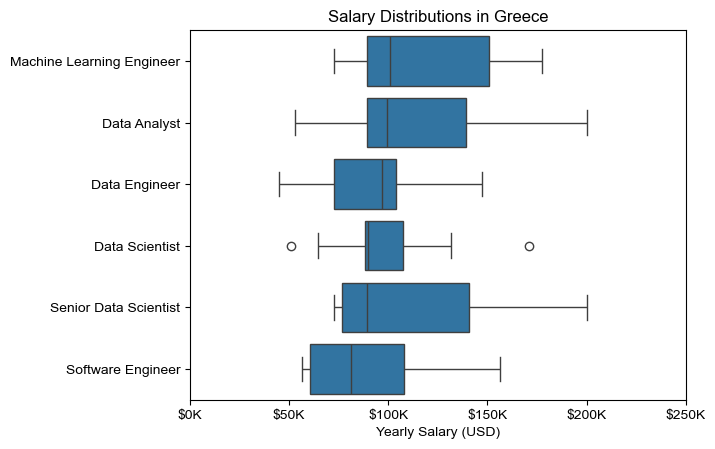

In [7]:
sns.boxplot(data=df_gr_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in Greece')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [8]:
df_gr_da = df[(df['job_country'] == 'Greece') & (df['job_title_short'] == 'Data Analyst')].copy()

In [9]:
df_gr_da = df_gr_da.dropna(subset='salary_year_avg')
df_gr_da = df_gr_da.explode('job_skills')

In [13]:
df_da_top_pay = df_gr_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)

df_da_top_pay = df_da_top_pay.head(10)

In [21]:
df_da_top_skills = df_gr_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

df_da_top_skills = df_da_top_skills.head(10).sort_values('median', ascending=False)

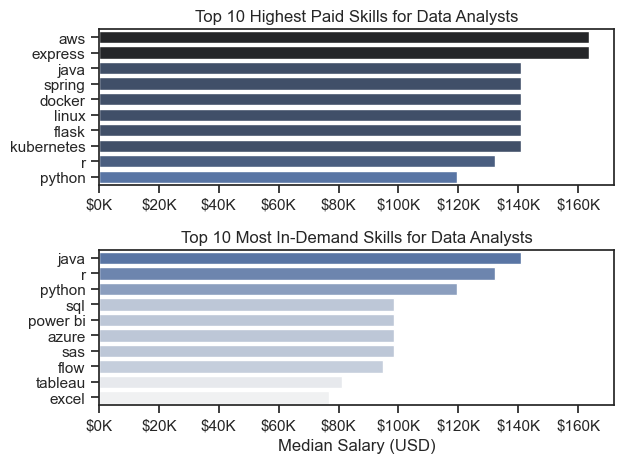

In [22]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r') #b for blue, r for reverse, hue:the column that we color
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_da_top_skills, x='median', y=df_da_top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()